## Dimensionality Reduction

In this notebook, we investigate the effect of dimensionality reduction on the performance of classifiers, and the best algorithm SVM is selected as the baseline in this experiment.

In [1]:
import sys, argparse
sys.path.append('..')
import helper
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.decomposition import PCA

/Users/gfaia/Applications/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### 1. Data preprocessing

In [2]:
pos_examples = [s.decode("utf-8", "ignore").strip() 
                for s in list(open(helper.mr_pos_data, mode="rb").readlines())]
neg_examples = [s.decode("utf-8", "ignore").strip() 
                for s in list(open(helper.mr_neg_data, mode="rb").readlines())]
pos_nums, neg_nums = len(pos_examples), len(neg_examples)
x = pos_examples + neg_examples
x = [helper.clean_str(sentence) for sentence in x]
pos_labels = [1 for _ in range(pos_nums)]
neg_labels = [0 for _ in range(neg_nums)]
y = pos_labels + neg_labels
x, y = np.array(x), np.array(y)

In [3]:
tfidf = TfidfVectorizer(min_df=2, ngram_range=(1,2))
tfidf.fit(x)
x_tf = tfidf.transform(x).toarray()
x_tf.shape

(10662, 29204)

### 2. Classification performance

The dimensionality reduction algorithm may lose some information of original dataset to some extent and this is why those of algorithms reduce the test performance.

In [4]:
n_dims = [100, 500, 1000]
for d in n_dims:
    pca = PCA(n_components=d)
    x_pca = pca.fit(x_tf).transform(x_tf)
    
    x_train_tf, y_train, x_dev_tf, y_dev = helper.split_train_dev(x_pca, y)
    svc = LinearSVC()
    svc.fit(x_train_tf, y_train)
    predicted = svc.predict(x_dev_tf)
    print("Accuracy: {0:.4f}".format(metrics.accuracy_score(predicted, y_dev)))
    print(metrics.classification_report(predicted, y_dev))

Accuracy: 0.6717
             precision    recall  f1-score   support

          0       0.67      0.67      0.67       531
          1       0.67      0.67      0.67       535

avg / total       0.67      0.67      0.67      1066

Accuracy: 0.7233
             precision    recall  f1-score   support

          0       0.71      0.72      0.72       521
          1       0.73      0.72      0.73       545

avg / total       0.72      0.72      0.72      1066

Accuracy: 0.7702
             precision    recall  f1-score   support

          0       0.79      0.75      0.77       549
          1       0.75      0.79      0.77       517

avg / total       0.77      0.77      0.77      1066



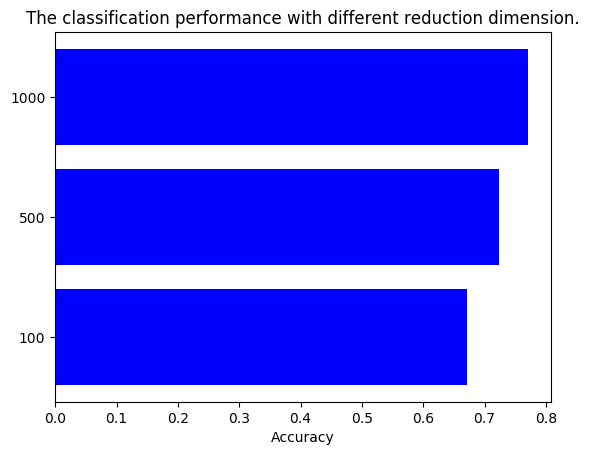

In [6]:
import matplotlib.pyplot as plt

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(3)
performance = [0.6717, 0.7233, 0.7702]

ax.barh(y_pos, performance, align='center',color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels([100, 500, 1000])
ax.set_xlabel('Accuracy')
ax.set_title('The classification performance with different reduction dimension.')

plt.show()